# Деревья

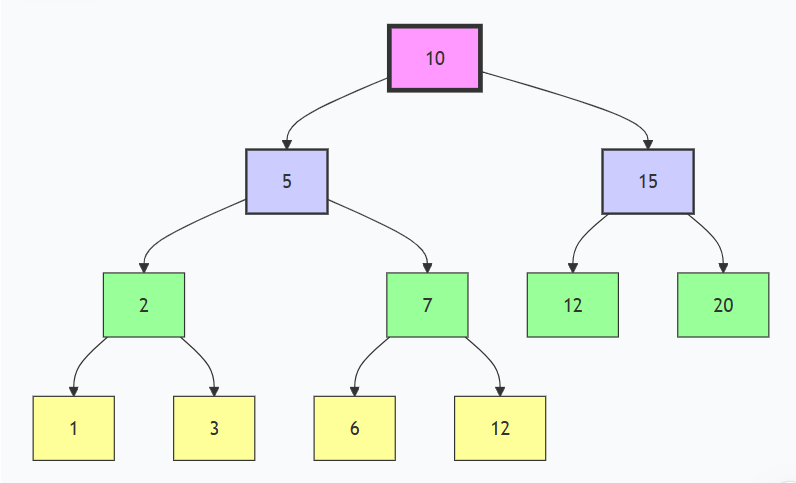

In [2]:
[10, 5, 15, 2, 7, 12, 20, 1, 3, 6]

[10, 5, 15, 2, 7, 12, 20, 1, 3, 6]

## Бинарное дерево поиска
- У каждого узла максимум два потомка (левый и правый)
- Для любого узла N из дерева выполняются свойства:
  - Все ключи в левом поддереве меньше ключа в родителе;
  - Все ключи в правом поддереве больше ключа в родителе;

In [3]:
class Node:
    def __init__(self, value) -> None:
        # Класс узла дерева
        self.value = value
        self.left = None
        self.right = None

In [24]:
class BinarySearchTree:
    def __init__(self) -> None:
        self.root = None
    
    def insert(self, value) -> None:
        """Вставка значения в дерево"""
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert_recursive(self.root, value)
    
    def _insert_recursive(self, node, value):
        """Рекурсивная вставка значения"""
        if value < node.value:
            if node.left is None:
                node.left = Node(value)
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = Node(value)
            else:
                self._insert_recursive(node.right, value)
    
    def build_tree(self, values: list):
        """Построение дерева из спика"""
        for value in values:
            self.insert(value)
            
    def value_in_tree(self, value) -> bool:
        """Проверяет есть ли искомое значение в дереве"""
        if self.root is None:
            return False
        
        return self._find_recursive(self.root, value)
    
    def _find_recursive(self, node, value) -> bool:
        """Рекурсивный поиск значения в дереве"""
        if node.value == value:
            return True
        
        if value < node.value:
            if node.left is None:
                return False
            else:
                return self._find_recursive(node.left, value)
        else:
            if node.right is None:
                return False
            else:
                return self._find_recursive(node.right, value)
                
            
    def print_tree(self):
        """Красивый вывод дерева в терминал"""
        if self.root is None:
            print("Дерево пустое")
            return
        
        lines, *_ = self._display_aux(self.root)
        for line in lines:
            print(line)
            
    def _display_aux(self, node):
        """Вспомогательная функция для красивого вывода дерева"""
        # Нет дочерних узлов
        if node.right is None and node.left is None:
            line = f"{node.value}"
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle
        
        # Только левый дочерний узел
        if node.right is None:
            lines, n, p, x = self._display_aux(node.left)
            s = f"{node.value}"
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2
        
        # Только правый дочерний узел
        if node.left is None:
            lines, n, p, x = self._display_aux(node.right)
            s = f"{node.value}"
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2
        
        # Есть оба дочерних узла
        left, n, p, x = self._display_aux(node.left)
        right, m, q, y = self._display_aux(node.right)
        s = f"{node.value}"
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2

In [25]:
tree = BinarySearchTree()

In [11]:
tree.print_tree()

Дерево пустое


In [26]:
tree.build_tree([10, 5, 15, 2, 7, 12, 20, 1, 3, 6])

In [13]:
tree.print_tree()

    __10___   
   /       \  
  _5_     15_ 
 /   \   /   \
 2   7  12  20
/ \ /         
1 3 6         


In [14]:
tree = BinarySearchTree()

In [22]:
tree.insert(4)
tree.print_tree()

     10_   
    /   \  
  __5  15_ 
 /        \
 2       20
/ \        
1 3        
   \       
   4       


In [27]:
tree = BinarySearchTree()
tree.build_tree([10, 5, 15, 2, 7, 12, 20, 1, 3, 6])
tree.print_tree()

    __10___   
   /       \  
  _5_     15_ 
 /   \   /   \
 2   7  12  20
/ \ /         
1 3 6         


In [30]:
tree.value_in_tree(20), \
tree.value_in_tree(-1)

(True, False)